# IML Assignment 1

## Student Name: Daniyar
## mail: ---

## Task 1

### Linear Regression
#### Data reading & plotting

In [1]:
import pandas as pd


df = pd.read_csv("task1_data.csv")

df.head()

,X_train,y_train,X_test,y_test
0,0.136018,-0.129555,0.000000,0.000000
1,0.207231,0.894330,0.172414,0.270000
2,0.246135,-0.791176,0.344828,0.535057
3,0.298175,0.180217,0.517241,0.790317
4,0.635941,3.722585,0.689655,1.031108


In [2]:
X_train, y_train, X_test, y_test = df.X_train.values.reshape(-1, 1), df.y_train.values.reshape(-1, 1), df.X_test.values.reshape(-1, 1), df.y_test.values.reshape(-1, 1)

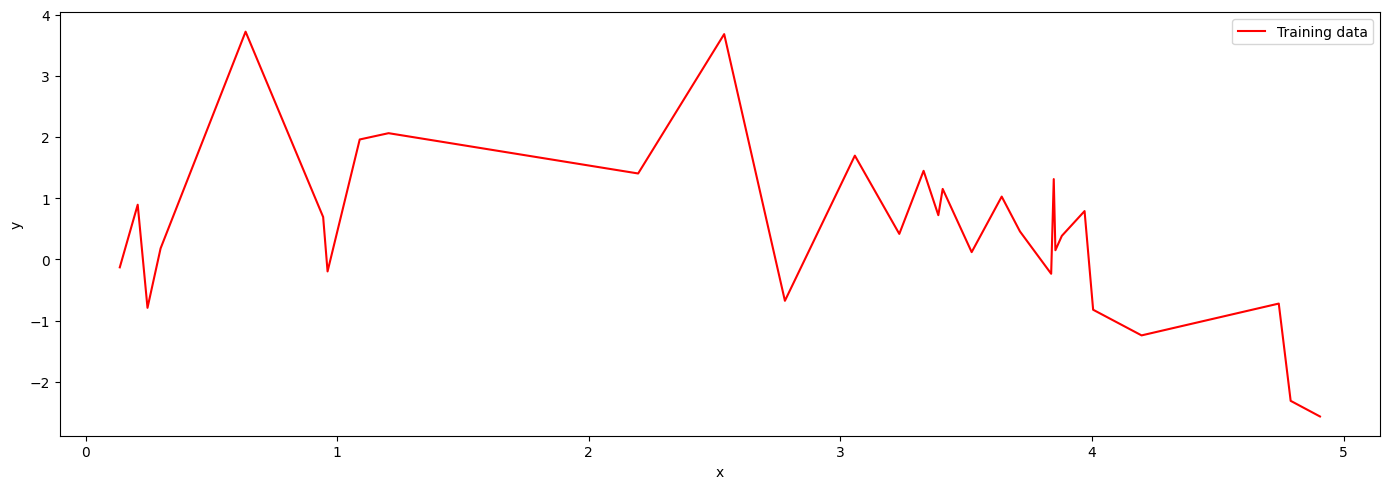

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.xlabel("x")
plt.ylabel("y")

# Plotting x_train against y_train
plt.plot(X_train, y_train, color='red', linestyle='solid', label='Training data')

plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Linear regression model fitting

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Linear regression model prediction & Evaluation


In [5]:
from sklearn import metrics

def print_metrics(y_actual, y_pred):
    print('MSE', metrics.mean_squared_error(y_actual, y_pred))
    print('RMSE', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print('MAE', metrics.mean_absolute_error(y_actual, y_pred))
    print('R2 score (coefficient of determination)', metrics.r2_score(y_actual, y_pred))

In [6]:
y_pred_lr = regressor.predict(X_test)

print_metrics(y_test, y_pred_lr)

MSE 0.78105677092199
RMSE 0.8837741628504365
MAE 0.7837610302414408
R2 score (coefficient of determination) 0.2609450135378707


#### Plotting original data and prediction


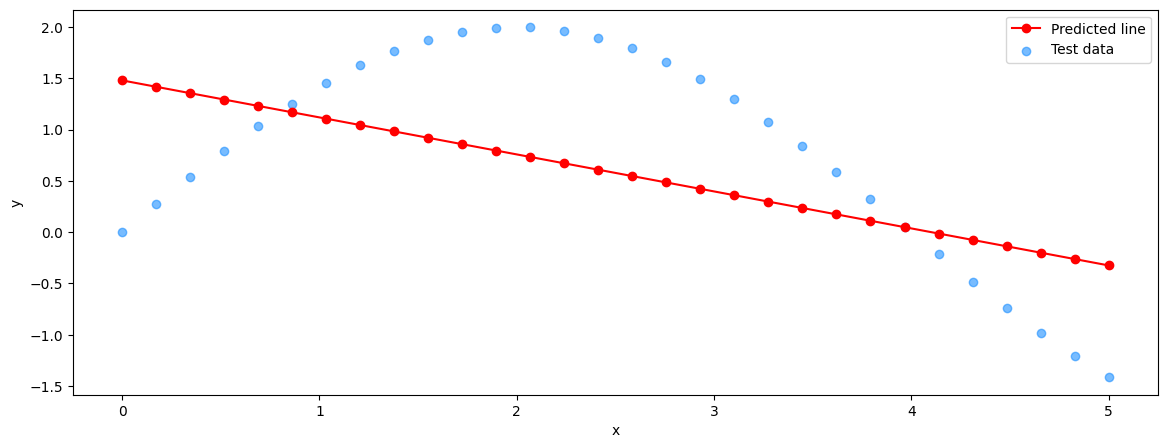

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Plotting test data
plt.scatter(X_test, y_test, c='dodgerblue', alpha=0.6, label='Test data')
# Plotting predictions
plt.plot(X_test, y_pred_lr, color='red', linestyle='solid', label='Predicted line', marker='o')

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Did the linear regression model give a good fit? Elaborate your answer

The linear regression model did not give a good fit because, by looking at the plot of test data, it is obvious that function that we are looking for is not linear, therefore, linear regression model could not give a good fit for it. In addition, the amount of samples is low and predictions could be a little bit more accurate if it was bigger.

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [9]:
polynomial_features = PolynomialFeatures()
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

#### Tuning the degree hyper-parameter using GridSearch

In [10]:
from sklearn.model_selection import GridSearchCV

degrees = list(range(2, 10))
parameters = {'polynomial_features__degree': degrees}

search = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring='neg_mean_squared_error', cv=8)
search.fit(X_train, y_train)

y_pred_pr = search.predict(X_test)

print(search.best_params_)
# We multiply by -1 to get an actual MSE score instead of negative MSE
print("Best parameter (CV score=%0.3f):" % (-1 * search.best_score_) )
print()

{'polynomial_features__degree': 2}
Best parameter (CV score=1.078):



In [11]:
print_metrics(y_pred_pr, y_test)

MSE 0.08205877217938008
RMSE 0.2864590235607531
MAE 0.15213273421671702
R2 score (coefficient of determination) 0.9433945592800026


#### Manually finding the best degree

In [12]:
# Mapping of degree to their negative MSE
scores_map = {}

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=8, scoring='neg_mean_squared_error')
    # taking an average of all cross validation scores
    avg_score = np.mean(scores)
    scores_map[degree] = avg_score

# sort out map by values (MSE) in ascending order
sorted_scores = dict(sorted(scores_map.items(), key=lambda item: -item[1]))
# get the first degree with the lowest MSE
degree = next(iter(sorted_scores))
# once again, we multiply by -1 to get actual MSE
print("Best degree is", degree, "with score", -1 * scores_map[degree])
    

Best degree is 2 with score 1.0783084797230353


#### Plotting the test data and the best degree polynomial model

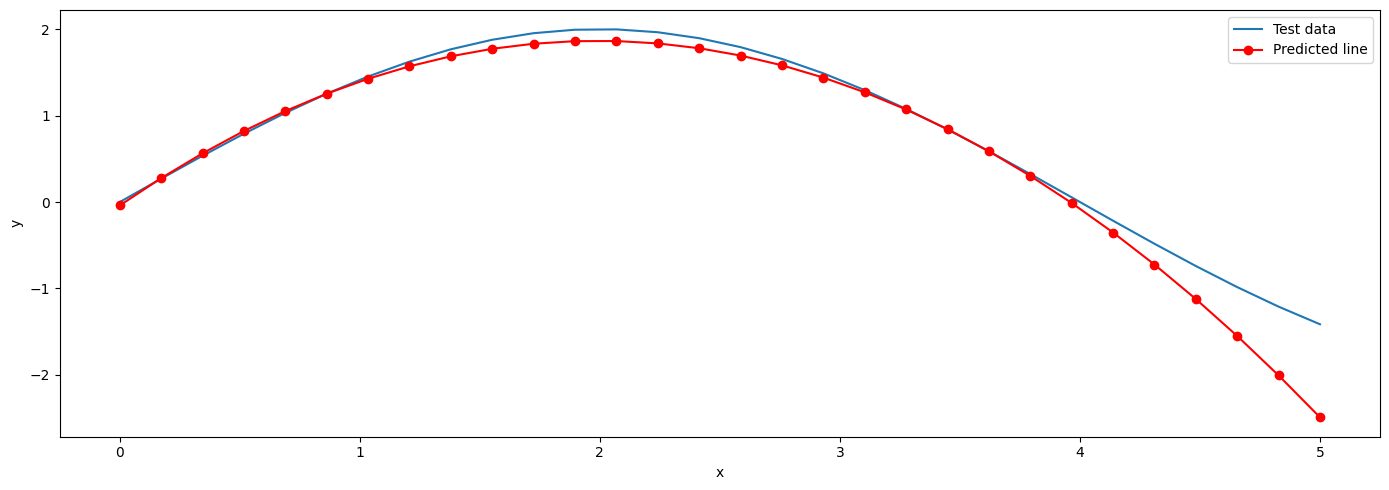

In [13]:
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label="Test data")

plt.xlabel("x")
plt.ylabel("y")

plt.plot(X_test, y_pred_pr, color='red', linestyle='solid', label='Predicted line', marker='o')

plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [14]:
import pandas as pd

df = pd.read_csv('pokemon_modified.csv')

#### Remove the 2 redundant features

In [15]:
new_columns = [column for column in df.columns if df[column].name not in ['name', 'classification']]

# print(df.name.value_counts())
# print(df.classification.value_counts())

X = df[new_columns].drop(['is_legendary'], axis=1)

y = df['is_legendary']

Name and classification features are redundant because their cardinality is too high, also, name feature is basically useless because it doesn't tell us about anything and all values among this column are unique

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

Check if the dataset is balanced or not and comment on it

In [17]:
values = y.value_counts()
total = values[0] + values[1]

print('Proportion of not legendary pokemons to total:', values[0] / total)
print('Proportion of legendary pokemons to total:', values[1] / total)

# Dataset is not balanced, since the binary target value is not evenly distributed,
# only around 8.7% of pokemons are not legendary, while remaining 91.3% of pokemons are legendary.

Proportion of not legendary pokemons to total: 0.9126092384519351
Proportion of legendary pokemons to total: 0.08739076154806492


#### Exploring the dataset and checking for missing values

In [18]:
df.info()
# height_m, percentage_male, weight_kg columns all has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [19]:
def find_missing_data_columns(frame):
    return [column for column in frame.columns if frame[column].isnull().any()]

#### Impute the missing values

In [20]:
print(find_missing_data_columns(X_train))
# X_train.dtypes

['height_m', 'percentage_male', 'weight_kg']


In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


#### Double check that there are no missing values

In [22]:
print('Number of missing data columns in X_train:', len(find_missing_data_columns(X_train)))

print('Number of missing data columns in X_test:', len(find_missing_data_columns(X_test)))

Number of missing data columns in X_train: 0
Number of missing data columns in X_test: 0


#### Encode categorically

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

In [24]:
def OHE(df, features, encoder):
    new_features = encoder.transform(df[features])
    new_columns = pd.DataFrame(new_features, columns=encoder.get_feature_names_out(features))

    new_df = pd.concat([df, new_columns], axis=1)
    # dropping initial columns after performing OHE on them
    new_df.drop(features, axis=1, inplace=True)
        
    return new_df

In [25]:
features = ['type1']

if features[0] in X_train.columns:
    encoder.fit(X_train[features])
    X_train = OHE(X_train, features, encoder)
    X_test = OHE(X_test, features, encoder)

X_train.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,1.0,1.0,1.0,2.0,1.0,2.0,0.25,0.5,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale the data

In [26]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

x_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
x_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

x_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Confusion Matrix

Are there highly co-related features in the dataset? Is it a problem?

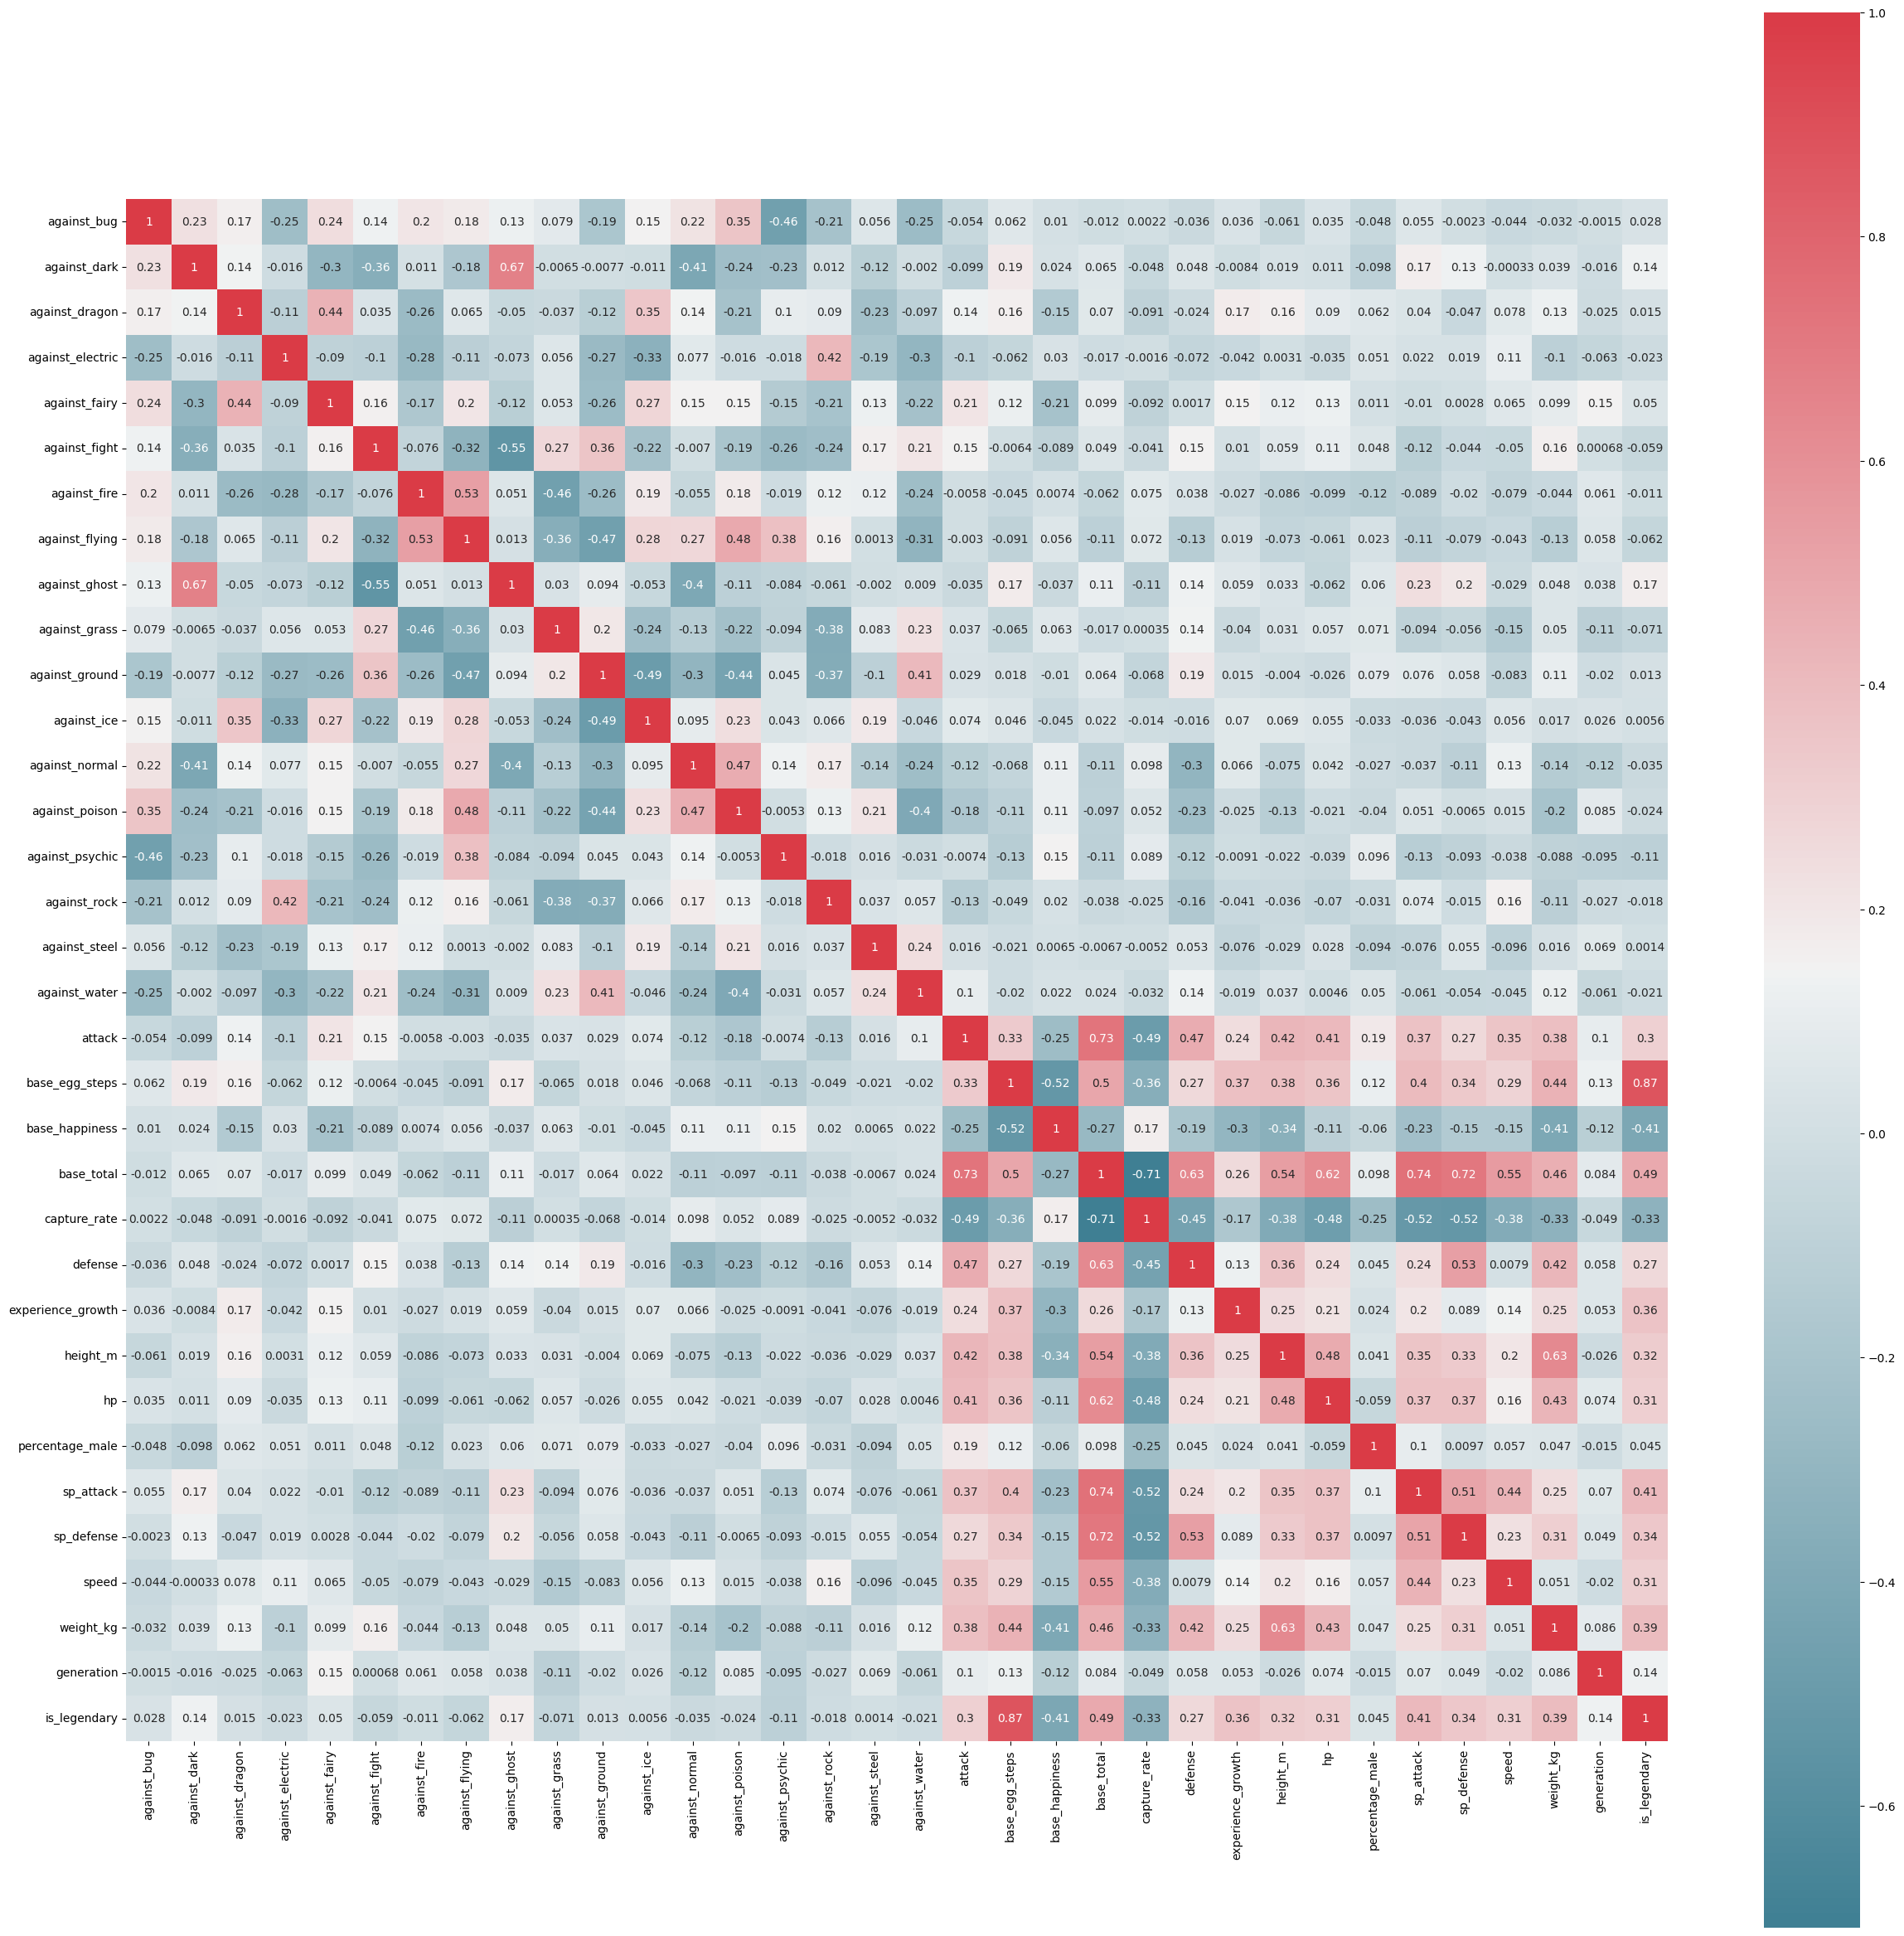

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation = df.corr()

f, ax = plt.subplots(figsize=(30, 30))

# Plotting a heatmap of our data frame correlation matrix
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

As you can see from the heatmap, there are some features that are highly positive or negative correlated (we only care about correlation between predictors, and not predictor and target). It is a problem, because multicollinearity reduces the precision of the estimate coefficients. We can drop those columns to also save computational power.

### Model fitting and Comparison

#### Tuning LR model

In [28]:
# caclulate and print metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def print_clf_metrics(y_actual, y_pred):
    print('Accuracy Score:', accuracy_score(y_actual, y_pred))
    print('Precision Score:', precision_score(y_actual, y_pred))
    print('Recall Score:', recall_score(y_actual, y_pred))
    print('F1 Score:', f1_score(y_actual, y_pred))

In [29]:
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty': ['l1', 'l2'],
              'C': np.logspace(-3, 3, 7),
              }

max_iter=1000 in LR constructor

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

gs_clf = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=parameters)
gs_clf.fit(x_train, y_train)

c:\users\данияр\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\данияр\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\данияр\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\данияр\appdata\local\programs\py

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [31]:
gs_clf.best_params_


{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [32]:
print("Tuned Hyperparameters:", gs_clf.best_params_)
print("Accuracy:", gs_clf.best_score_)

Tuned Hyperparameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9890625


#### Construct a LR with the best params and Evaluate the LR with the best params

In [33]:
lr_clf = LogisticRegression(**gs_clf.best_params_)

In [34]:
lr_clf.fit(x_train, y_train)

LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

In [35]:
y_pred = lr_clf.predict(x_test)
print_clf_metrics(y_test, y_pred)

Accuracy Score: 0.9937888198757764
Precision Score: 0.9333333333333333
Recall Score: 1.0
F1 Score: 0.9655172413793104



#### Print the top 5 most influencing features and the top 5 ignored features

In [36]:
import random

# retrieving coefficients from our LR model
impact_coefficients = lr_clf.coef_[0]
results = []

ignored = set()

# coefficients impact might be positive and negative, and 
# both influence a lot but in opposite ways, therefore,
# we need to sort by absolute value without changing the actual values
for i, coef in enumerate(sorted(impact_coefficients, key=abs)[::-1]):
    # getting column indices from coefficient
    matches = np.where(impact_coefficients == coef)
    
    # if the coefficient is unique, we 
    if len(matches[0]) == 1:
        index = matches[0][0]
        results.append((x_train[x_train.columns[index]].name, coef))
    else:
        # if the coefficient is not unique, it is zero and those columns
        # do not have any impact, so we add them to the set of ignored features
        if coef == 0:
            for index in matches[0]:
                ignored.add(f'{x_train[x_train.columns[index]].name}: {coef} ')

print("Top 5 most influencing features:")
# selecting top 5 influencing features from list
[print(f'{feature}: {coef}') for feature, coef in results[:5]]

print("\nTop 5 ignored features:")

# randomly selecting 5 distinct features from the set of ignored features
# (because they are equally ignored with coefficient 0)
print('\n'.join(random.sample(tuple(ignored), k=5)))

Top 5 most influencing features:
base_egg_steps: 13.522730085665625
capture_rate: -10.614534495427385
type1_normal: -9.640084483518674
base_total: 7.459596044786603
experience_growth: 6.958090940437504

Top 5 ignored features:
against_fairy: 0.0 
type1_electric: 0.0 
type1_rock: 0.0 
type1_fighting: 0.0 
type1_dragon: 0.0 


#### Tuning KNN model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': list(range(1, 15)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
             }

grid_search_clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid)
grid_search_clf.fit(x_train, y_train)

grid_search_clf.best_score_

print("Tuned Hyperparameters:", grid_search_clf.best_params_)
print("Accuracy:", gs_clf.best_score_)

Tuned Hyperparameters: {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.9890625


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [38]:
knn = KNeighborsClassifier(**grid_search_clf.best_params_)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print_clf_metrics(y_test, y_pred)

Accuracy Score: 0.9751552795031055
Precision Score: 1.0
Recall Score: 0.7142857142857143
F1 Score: 0.8333333333333333


#### Fitting GNB to the data and evaluating on the test dataset

In [39]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_test)

print_clf_metrics(y_test, y_pred)

Accuracy Score: 0.9316770186335404
Precision Score: 0.56
Recall Score: 1.0
F1 Score: 0.717948717948718


#### Which metric is most appropriate for this task and why?

F1 score metric is most appropriate for this task because it takes into consideration both recall and precision, and generally it is a better measure when the dataset is imbalanced.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? and based on what
did you pick it?

The best model for this task is Logistic Regression because it has the highest F1 score among other models. Accuracy of this model is also the best, nearly 1.

## Bonus Task

#### Loading the Dataset

In [40]:
import pandas as pd
train_data = pd.read_csv('bonus_train.csv')

test_data = pd.read_csv('bonus_test.csv')

train_data

,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0
...,...,...,...,...
265,87.227771,3.738061,320.135382,2
266,-4.605994,3.688628,204.136303,1
267,44.178216,5.085936,198.365089,0
268,6.169277,3.328219,204.934675,0


In [41]:
predictors = ['var1', 'var2', 'var3']

X_train = train_data[predictors]
y_train = train_data['target']

X_test = test_data[predictors]
y_test = test_data['target']

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

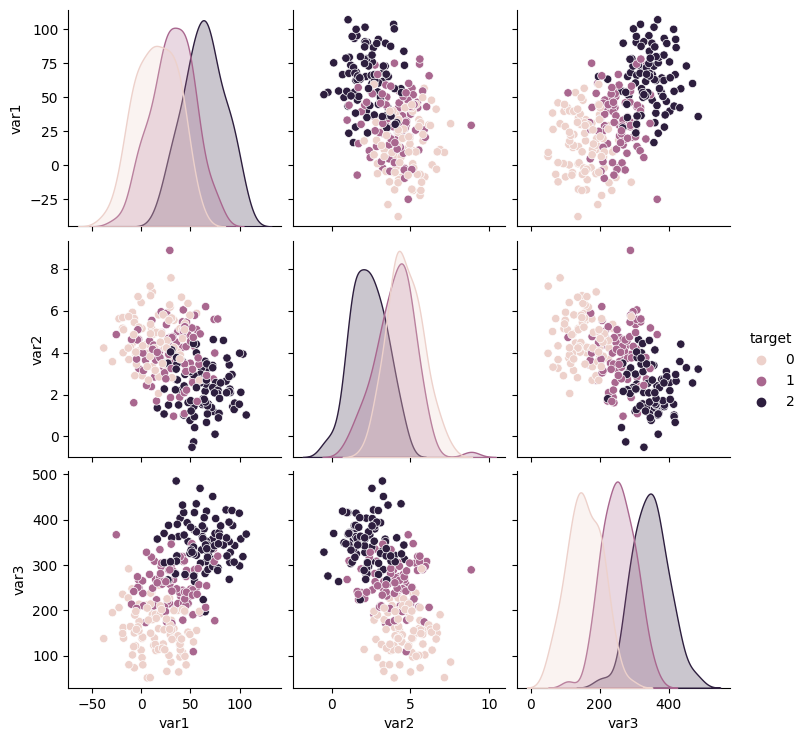

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data, hue='target', kind='scatter')

plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [43]:
ovr_lr = LogisticRegression(multi_class='ovr')
ovr_lr.fit(X_train, y_train)

y_pred_ovr_lr = ovr_lr.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print("Accuracy of OVR LR:", accuracy_score(y_test, y_pred_ovr_lr))

Accuracy of OVR LR: 0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [45]:
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
multi_lr.fit(X_train, y_train)

y_pred_multi_lr = multi_lr.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
print("Accuracy of OVO LR:", accuracy_score(y_test, y_pred_multi_lr))

Accuracy of OVO LR: 0.9


#### Using gridsearch to tune the C value and multi class

In [47]:
params = {'C': np.logspace(-10, 10, 7),
         'multi_class': ['multinomial', 'ovr']}

In [48]:
grid_search_clf = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=params)
grid_search_clf.fit(X_train, y_train)

grid_search_clf.best_params_

{'C': 2154.4346900318865, 'multi_class': 'multinomial'}

In [49]:
print("Tuned Hyperparameters:", grid_search_clf.best_params_)
print("Accuracy:", grid_search_clf.best_score_)

Tuned Hyperparameters: {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy: 0.825925925925926


#### Comment on why one multi_class technique was better than the other
multi_class technique is better because it creates more models and, therefore, is more accurate. However, if amount of features is too high, the evaluation time with this technique will be too high. Because in our case we have only 3 features, we can use multi_class technique without any time losses.

#### Create LR with the best params

In [50]:
multi_lr = LogisticRegression(**grid_search_clf.best_params_)

#### Visualize the decision boundaries

c:\users\данияр\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


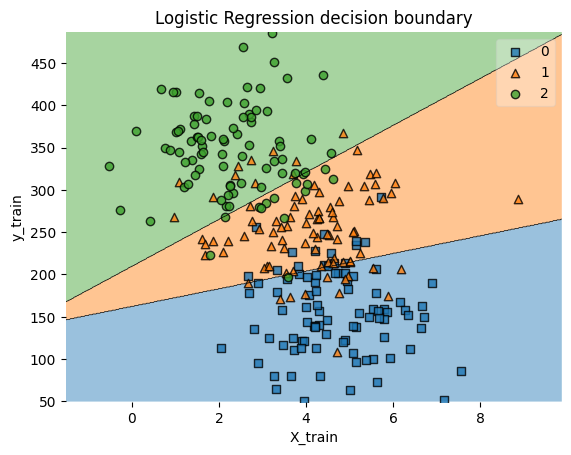

In [51]:
from mlxtend.plotting import plot_decision_regions

# We can drop arbitrary feature, so I chose var1
multi_lr.fit(X_train.drop('var1', axis=1), y_train)

plot_decision_regions(np.array(X_train.drop('var1', axis=1)), np.array(y_train), clf=multi_lr)

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?
This model does not look so good, because by looking at the decision boundary plot, you can see that sometimes predictors are far outside of their region, for example, some values of blue predictor almost enter green predictor, which is 2 regions above.